<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/WQU_ML_Group_4705_Codings_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WQU ML Group 4705 GWP 01


PART I (ALPER): RIDGE REGRESSION

### 1. Ridge Regression

The Ridge method is called a *shrinkage* regularization technique that aims at keeping the smallest values possible for the parameters of the model. To achieve this, the regularization term is of the form
$$
\begin{align*}
\alpha\sum_{i=1}^n \theta_i^2
\end{align*}
$$
The hyperparameter $\alpha$ determines how much we wish to regularize the model. If $\alpha=0$, we are trivially not regularizing the model while, if $\alpha$ is very large, then all parameters will be close to zero and our fit of the data will be a flat line through the average of the labels $y$ in the training sample (Notice that the regularization term above does not include the bias term $\theta_0$).

The cost function for a linear regression with a ridge penalty (Ridge Regression) is then given by
$$
\begin{align*}
J(\theta) = MSE(\theta) + \frac{1}{2}\alpha\sum_{i=1}^n \theta_i^2
\end{align*}
$$

Thus, if we perform gradient descent, the update of the parameters will be given by:
$$
\begin{align*}
\theta^{[next\ step]}=\theta^{[previous\ step]} - \eta \nabla_{\theta} MSE\left(\theta^{[previous\ step]}\right) - a \odot \theta^{[previous\ step]}
\end{align*}
$$

where $a$ is a column vector of $n$ elements all of which have the value $\alpha$, except the first term that has a value of 0, in association with the term $\theta_0$ not being regularized, and $\odot$ refers to element-by-element multiplication. Finally, notice that the $1/2$ multiplying $\alpha$ and the parameters in the penalty function is just to get a cleaner derivative once we compute the gradient.





In [48]:
import numpy as np
import pandas as pd
import yfinance as yf

# Getting historical market data for Microsoft stock.
df = yf.download("MSFT", start="2013-12-11", end="2023-12-11")
X = df["Adj Close"].values

df["Ret"] = df["Adj Close"].pct_change()

name = "Ret"
df["Ret30_i"] = (
    df[name].rolling(30).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 30) - 1))
)
df["Ret60_i"] = (
    df[name].rolling(60).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 60) - 1))
)
df["Ret90_i"] = (
    df[name].rolling(90).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 90) - 1))
)
df["Ret120_i"] = (
    df[name].rolling(120).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 120) - 1))
)
df["Ret240_i"] = (
    df[name].rolling(240).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 240) - 1))
)


del df["Open"]
del df["Close"]
del df["High"]
del df["Low"]
del df["Volume"]
del df["Adj Close"]
df.ffill(inplace=True)
y = df["Ret"].shift(-1)
X = df



df.tail(10)
print(df.tail(10))


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Preparation
# X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)
#X, y = df.iloc[:, 0:-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 2: Model Fitting
# Ordinary Linear Regression
lr = LinearRegression()
X_train.shape, y_train.shape

[*********************100%%**********************]  1 of 1 completed
                 Ret   Ret30_i   Ret60_i   Ret90_i  Ret120_i  Ret240_i
Date                                                                  
2023-11-27  0.003126  0.489005  0.244052  0.101940  0.108781  0.172600
2023-11-28  0.010803  0.475186  0.257423  0.123878  0.143908  0.169858
2023-11-29 -0.010060  0.447171  0.215858  0.108303  0.130634  0.165151
2023-11-30  0.000158  0.467424  0.219481  0.089720  0.126850  0.178757
2023-12-01 -0.011612  0.416068  0.214941  0.119400  0.104286  0.181187
2023-12-04 -0.014339  0.415036  0.168900  0.126799  0.086128  0.182454
2023-12-05  0.009156  0.418501  0.165887  0.111499  0.086155  0.183922
2023-12-06 -0.009986  0.372641  0.179895  0.108419  0.051603  0.175217
2023-12-07  0.005830  0.291025  0.168150  0.113495  0.070387  0.188438
2023-12-08  0.008842  0.448402  0.169783  0.152922  0.088222  0.191168


((1761, 6), (1761,))

In [49]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


print("Any NaNs in X_train:", X_train.isnull().any().any())
print("Any NaNs in y_train:", y_train.isnull().any())

X_train.interpolate(method='time', inplace=True)
y_train.interpolate(method='time', inplace=True)

X_test.interpolate(method='time', inplace=True)
y_test.interpolate(method='time', inplace=True)

# Check if any NaNs remain
print("NaNs in X_train:", X_train.isnull().any().any())
print("NaNs in y_train:", y_train.isnull().any())

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_test_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_test_lr)


# Ridge Regression

ridge = Ridge(alpha=80)  # Alpha is the regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2) for LR: %.6f, for Ridge : %.6f" % (r2_score(y_test, y_pred_test_lr),r2_score(y_test, y_pred_test_ridge)))
print("Mean Square Error for LR: %.6f, Ridge: %.6f" % (mse_lr, mse_ridge))


X_train shape: (1761, 6)
y_train shape: (1761,)
Any NaNs in X_train: True
Any NaNs in y_train: True
NaNs in X_train: False
NaNs in y_train: False
Coefficient of determination (R2) for LR: 0.004891, for Ridge : 0.002831
Mean Square Error for LR: 0.000309, Ridge: 0.000310


COEFFICIENTS AND EQUATIONS FOR LINEAR AND RIDGE:

In [50]:

# get LS coefficient and print them
lr_coefficient = pd.DataFrame()
lr_coefficient["Columns"] = X_train.columns
lr_coefficient["Coefficient Estimate"] = pd.Series(lr.coef_)
print("Linear Regression Coefficients:",lr_coefficient)


# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = X_train.columns
ridge_coefficient["Coefficient Estimate"] = pd.Series(ridge.coef_)
print("Ridge Coefficients:",ridge_coefficient)


Linear Regression Coefficients:     Columns  Coefficient Estimate
0       Ret             -0.143699
1   Ret30_i             -0.005598
2   Ret60_i              0.004330
3   Ret90_i             -0.003778
4  Ret120_i              0.008576
5  Ret240_i             -0.007733
Ridge Coefficients:     Columns  Coefficient Estimate
0       Ret             -0.000927
1   Ret30_i             -0.003135
2   Ret60_i             -0.000128
3   Ret90_i             -0.000286
4  Ret120_i              0.000110
5  Ret240_i             -0.000230


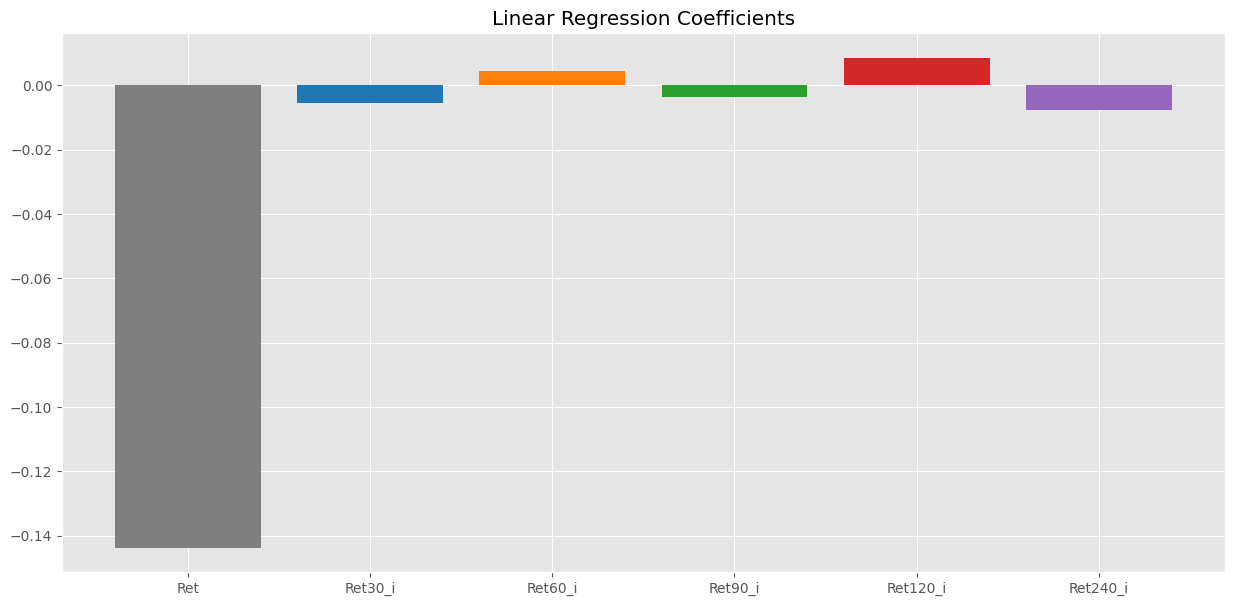

In [51]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(15, 7))

color = [
    "tab:gray",
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown",
    "tab:pink",
    "tab:gray",
    "tab:olive",
    "tab:cyan",
    "tab:orange",
    "tab:green",
    "tab:blue",
    "tab:olive",
]

ax.bar(
    lr_coefficient["Columns"], lr_coefficient["Coefficient Estimate"], color=color
)
plt.title("Linear Regression Coefficients")
plt.style.use("ggplot")
plt.show()
# plotting the coefficient score


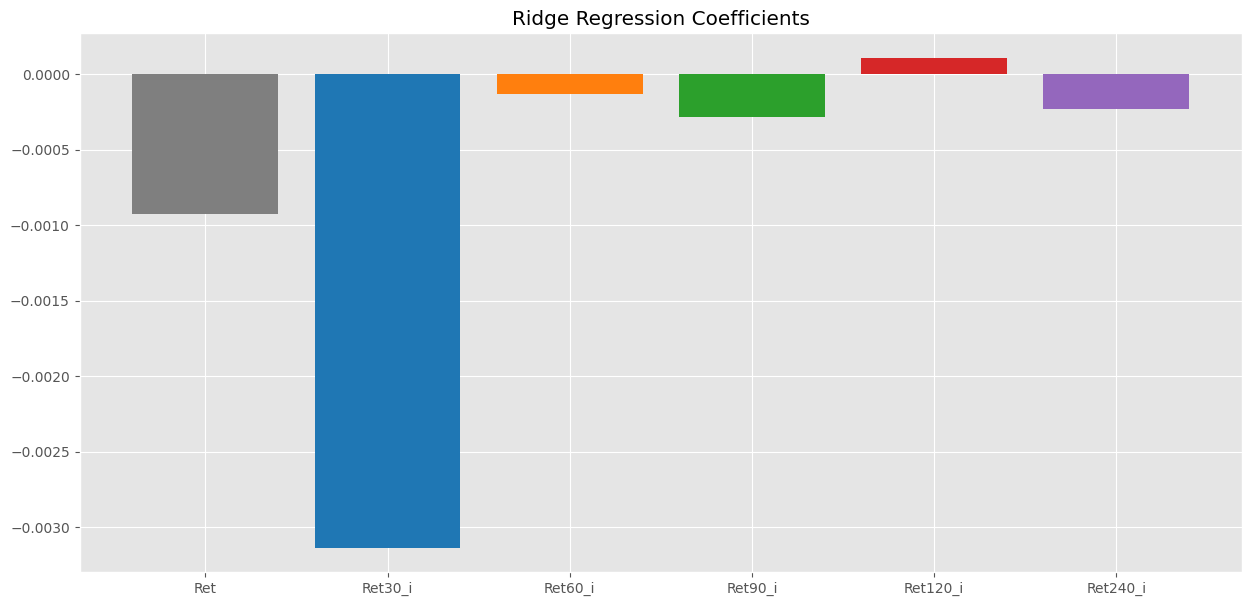

In [52]:
fig, ax = plt.subplots(figsize=(15, 7))

color = [
    "tab:gray",
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown",
    "tab:pink",
    "tab:gray",
    "tab:olive",
    "tab:cyan",
    "tab:orange",
    "tab:green",
    "tab:blue",
    "tab:olive",
]

ax.bar(
    ridge_coefficient["Columns"], ridge_coefficient["Coefficient Estimate"], color=color
)

plt.title("Ridge Regression Coefficients")
plt.style.use("ggplot")
plt.show()

COMPARISION OF LINEAR AND RIDGE REGRESSION

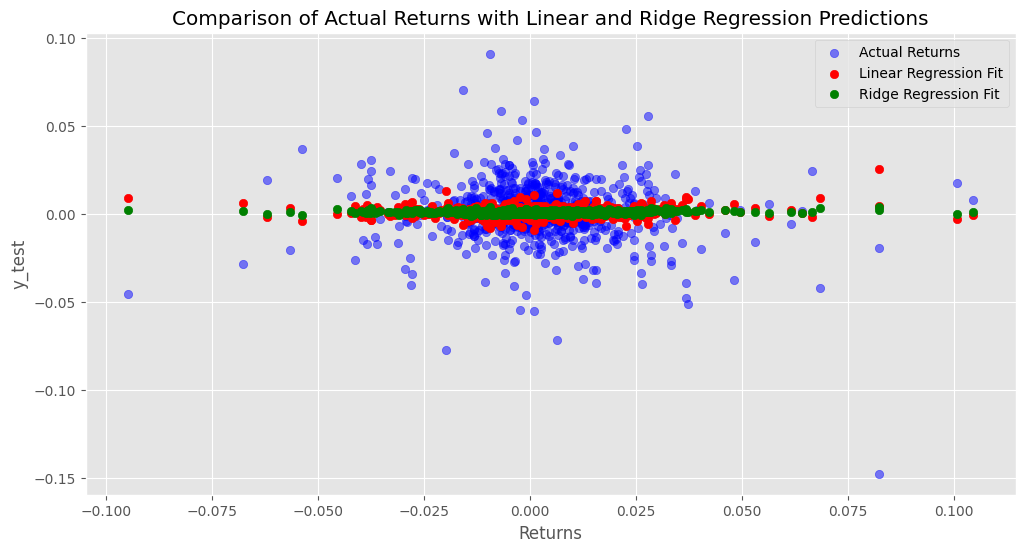

In [56]:
plt.figure(figsize=(12, 6))

# Scatter Plot of Actual Values
plt.scatter(y_test, X_test['Ret'], color='b', alpha=0.5, label='Actual Returns')

# Plot of Predicted Values from Linear Regression
plt.scatter(y_test, y_pred_test_lr, color='r', label='Linear Regression Fit')

# Plot of Predicted Values from Ridge Regression
plt.scatter(y_test, y_pred_test_ridge, color='g', label='Ridge Regression Fit')

plt.title('Comparison of Actual Returns with Linear and Ridge Regression Predictions')
plt.xlabel('Returns')
plt.ylabel('y_test')
plt.legend()
plt.show()


HYPERPARAMETER (ALPHA) TUNING OF RIDGE REGRESSION

In [54]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid["alpha"] = [1e-3,1e-2,1e-1,0,1,10,1e2,1e3,1e4,1E5]
search = GridSearchCV(ridge, grid, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print("MSE: %.3f" % results.best_score_)
print("Config: %s" % results.best_params_)

MSE: -0.000
Config: {'alpha': 0.1}


------------------------------------------------------------------------------

PART II (SEAN): HIERARCHICAL CLUSTERING

------------------------------------------------------------------------------

PART III (KRISHNA): PRINCIPLE COMPONENTS